In [1]:
import yaml
import sys
sys.path.append("../../src")
from images import get_predictions
from images import plot_predictions
from images import create_train_test
from images import to_tensorflow
from images import create_model
import os

In [2]:
with open("../../ml_models/images/image_model.yaml", "r") as f:
    macro_soft_f1_config = yaml.safe_load(f)

INPUT_SHAPE = (224,224,3)

data_path = "../../data/processed/data.json"
#This splits the recepies into train and test. This doesn't actually load the features of the data
X_train, X_val, y_train, y_val = create_train_test(macro_soft_f1_config,data_path, "geographical_tags_updated")

#This part loads in the data as tensorflow objects
train_ds, val_ds, N_LABELS, y_val_bin, mlb = to_tensorflow(X_train, X_val, y_train, y_val, macro_soft_f1_config)

2023-11-29 10:40:00.185016: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-11-29 10:40:00.185041: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-11-29 10:40:00.185049: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-11-29 10:40:00.185104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-29 10:40:00.185298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [3]:
#model_path = f"../ML Models/tags/{macro_soft_f1_config['LOSS_FUNCTION']}/"
#number = str(len(os.listdir(model_path)))
#model_path += "final_model_50_epochs.h5"

model_path = '../../ml_models/images/final_model_25_epochs.h5'

#Load weights
model = create_model(macro_soft_f1_config, INPUT_SHAPE, N_LABELS)
model.load_weights(model_path)

In [5]:
predictions = get_predictions(model, mlb, val_ds, boundary = 0.95)

2023-11-29 10:40:05.901107: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 6s 48ms/step


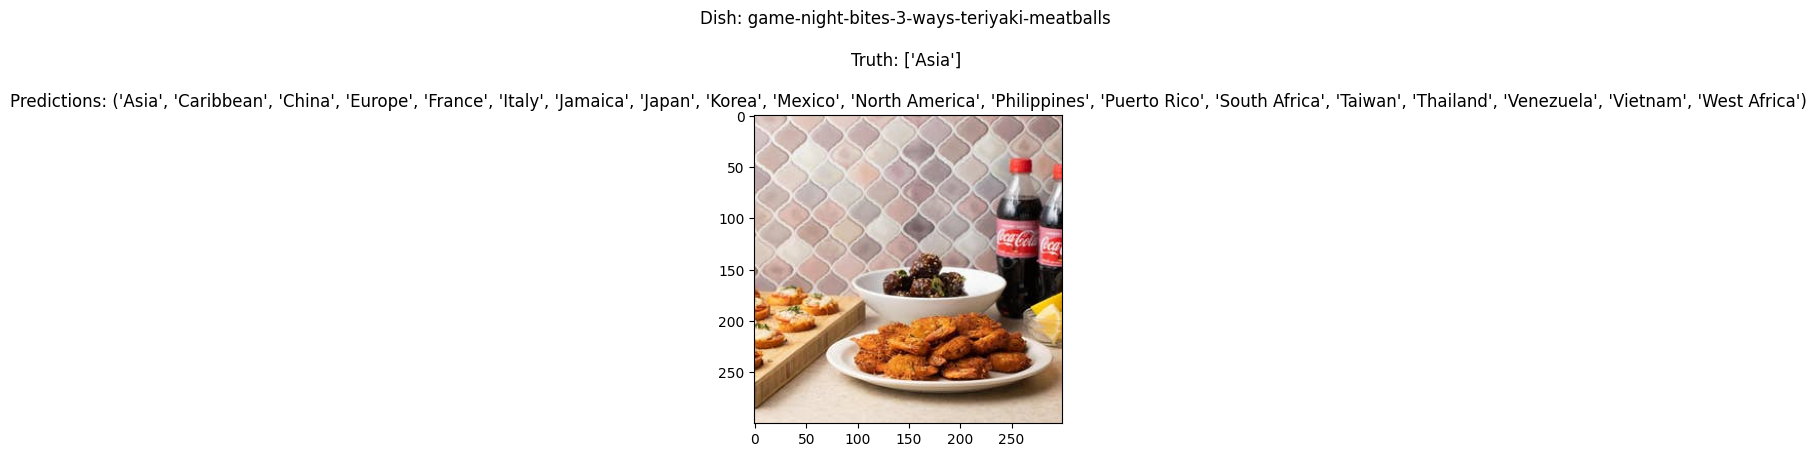

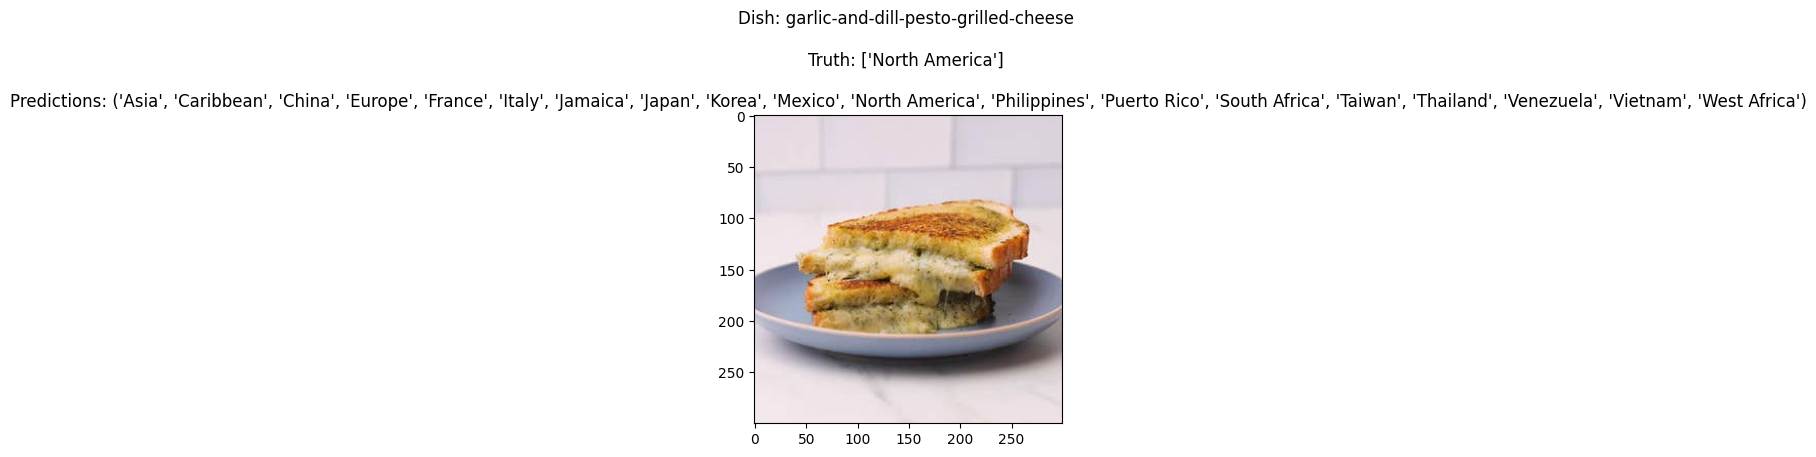

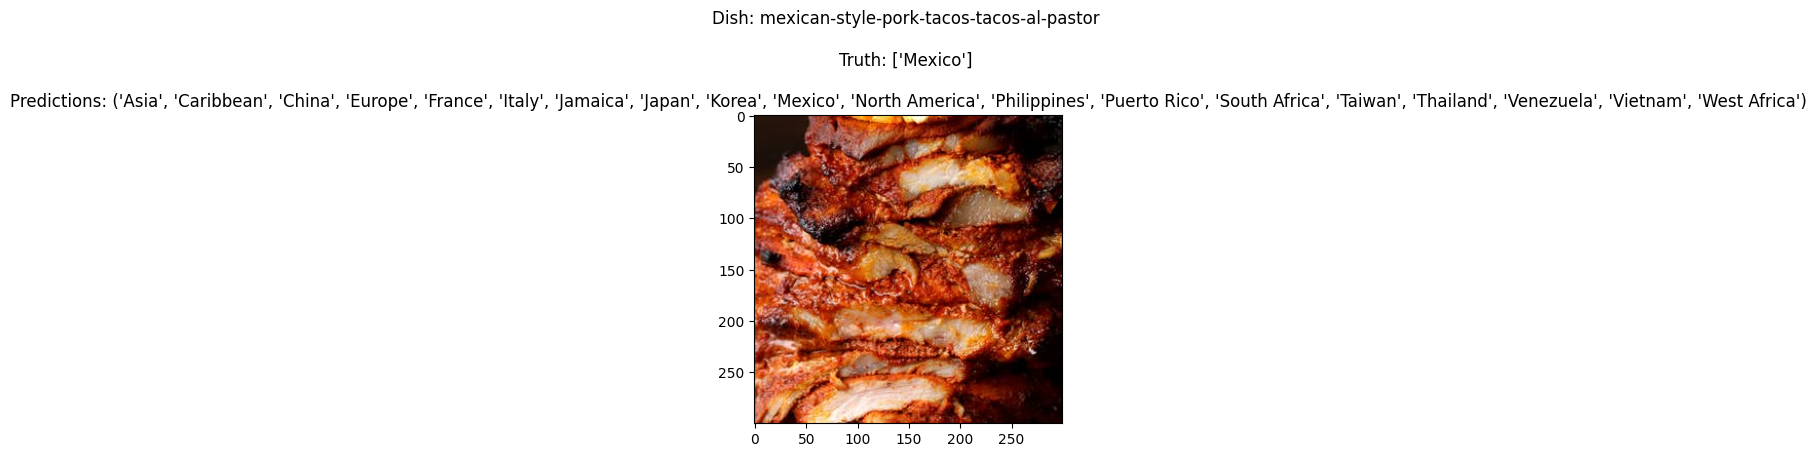

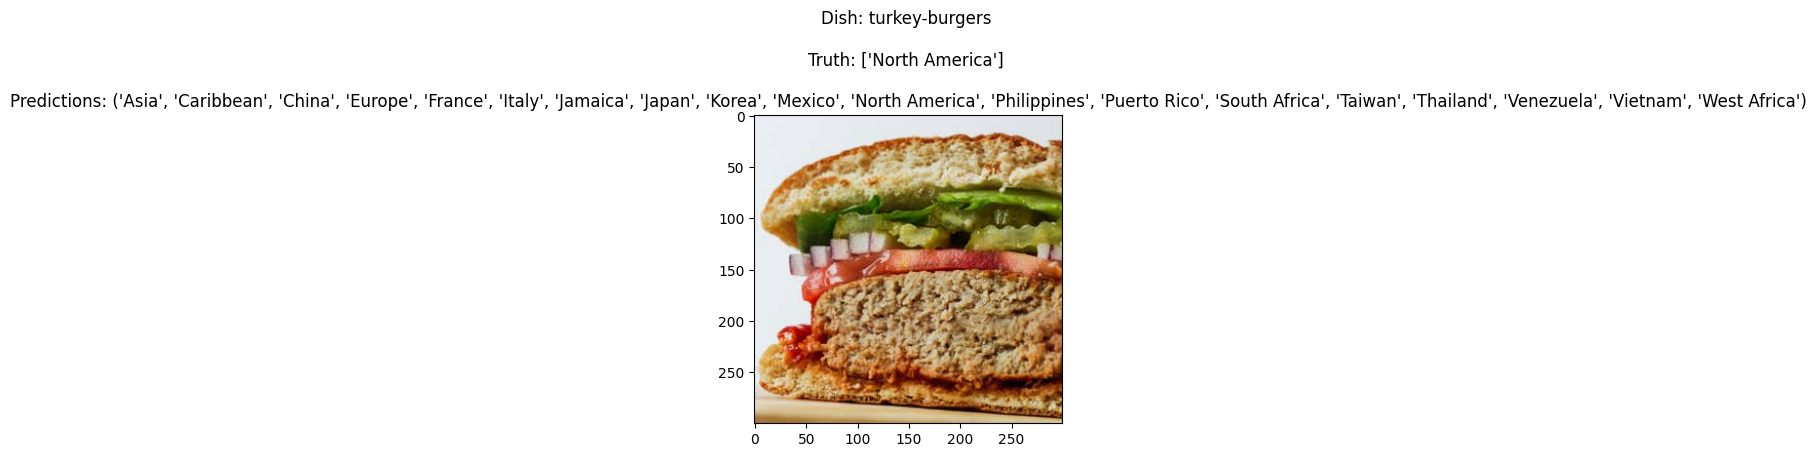

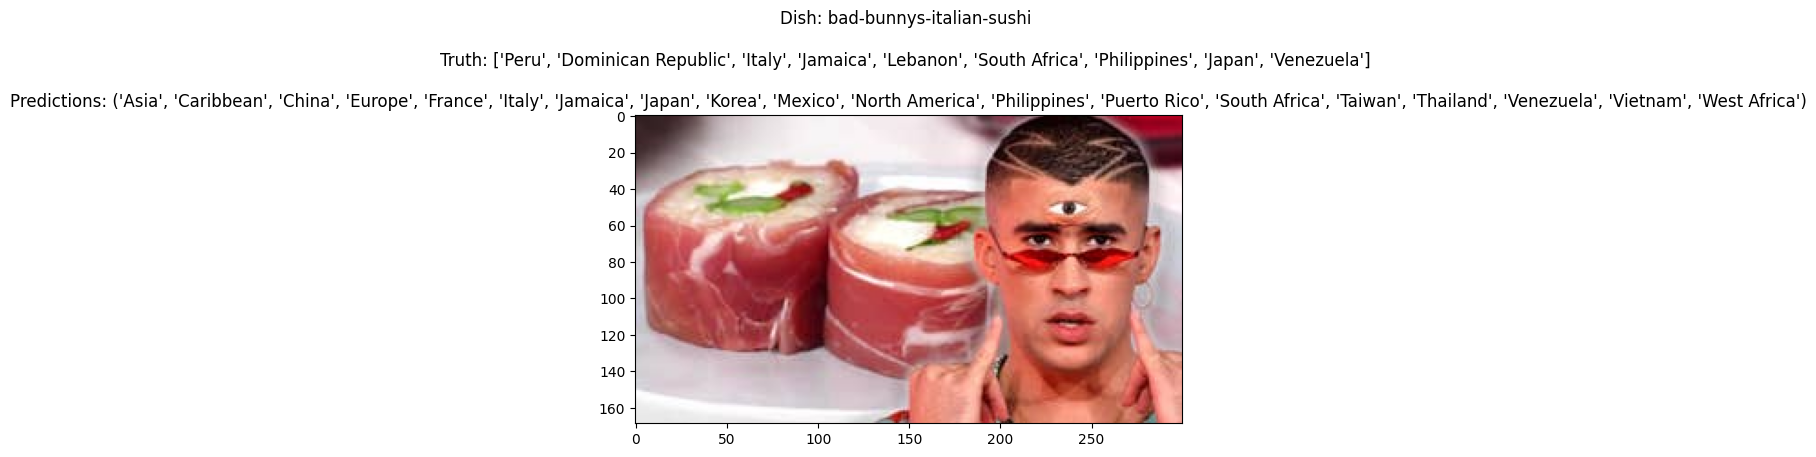

In [6]:
plot_predictions(predictions,X_val,y_val,"macro_soft_f1",5)